In [ ]:
#Toufeeqque
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"toufeequek","key":"b13875bc98b1b255b9803a78cd176988"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install opendatasets
!pip install pandas


In [ ]:
# import opendatasets as od
# import pandas as pd

# od.download("muratkokludataset/acoustic-extinguisher-fire-dataset")


In [ ]:
import kaggle
kaggle.api.authenticate()

In [ ]:
kaggle.api.dataset_download_files('birdy654/cifake-real-and-ai-generated-synthetic-images', path='CIFAKE', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images


In [ ]:
import os
import cv2
import numpy as np

def load_cifake_dataset(folder_path):
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []

    # Define a mapping from class names to integer labels
    class_map = {'REAL': 0, 'FAKE': 1}  # Mapping 'REAL' to 0 and 'Fake' to 1

    # Load training data
    train_folder = os.path.join(folder_path, 'train')
    for class_name in os.listdir(train_folder):
        class_dir = os.path.join(train_folder, class_name)
        class_label = class_map[class_name]  # Get the integer label corresponding to the class name
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (32, 32))  # Resize to match CIFAR-10 image size
            X_train.append(img)
            Y_train.append(class_label)

    # Load testing data
    test_folder = os.path.join(folder_path, 'test')
    for class_name in os.listdir(test_folder):
        class_dir = os.path.join(test_folder, class_name)
        class_label = class_map[class_name]  # Get the integer label corresponding to the class name
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (32, 32))  # Resize to match CIFAR-10 image size
            X_test.append(img)
            Y_test.append(class_label)

    # Convert lists to numpy arrays
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)

    return (X_train, Y_train), (X_test, Y_test)

# Load CIFake dataset from the specified directory
cifake_folder_path = '/content/CIFAKE'
(X_train, Y_train), (X_test, Y_test) = load_cifake_dataset(cifake_folder_path)

# '/content/CIFAKE'

In [ ]:

cifake_folder_path = '/content/CIFAKE'
(X_train, Y_train), (X_test, Y_test) = load_cifake_dataset(cifake_folder_path)

print("Training data shape:", X_train.shape)
print("Training labels shape:", Y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", Y_test.shape)


Training data shape: (100000, 32, 32, 3)
Training labels shape: (100000,)
Testing data shape: (20000, 32, 32, 3)
Testing labels shape: (20000,)


array([[[ 25,  28,  12],
        [ 50,  53,  37],
        [ 58,  64,  47],
        ...,
        [ 51,  50,  60],
        [ 44,  37,  50],
        [ 37,  30,  43]],

       [[ 22,  32,  15],
        [ 28,  38,  21],
        [ 26,  36,  19],
        ...,
        [ 39,  40,  50],
        [ 31,  29,  41],
        [ 13,   9,  21]],

       [[ 19,  38,  21],
        [ 21,  43,  25],
        [ 22,  44,  26],
        ...,
        [ 28,  33,  42],
        [ 20,  22,  32],
        [ 24,  26,  36]],

       ...,

       [[201, 200, 210],
        [220, 219, 229],
        [231, 230, 240],
        ...,
        [ 59,  78,  61],
        [ 46,  63,  54],
        [ 58,  74,  67]],

       [[127, 124, 133],
        [172, 171, 180],
        [206, 205, 214],
        ...,
        [ 96, 115, 100],
        [ 83,  99,  92],
        [ 88, 105, 101]],

       [[ 39,  36,  45],
        [103, 100, 109],
        [159, 158, 167],
        ...,
        [121, 140, 125],
        [112, 130, 123],
        [121, 138, 135]]], dtype=uint8)
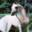

In [ ]:
X_train.shape
X_train[0]

In [ ]:
#  I normalize the input data to range from 0 to 1.

X_train = X_train / 255
X_test = X_test / 255

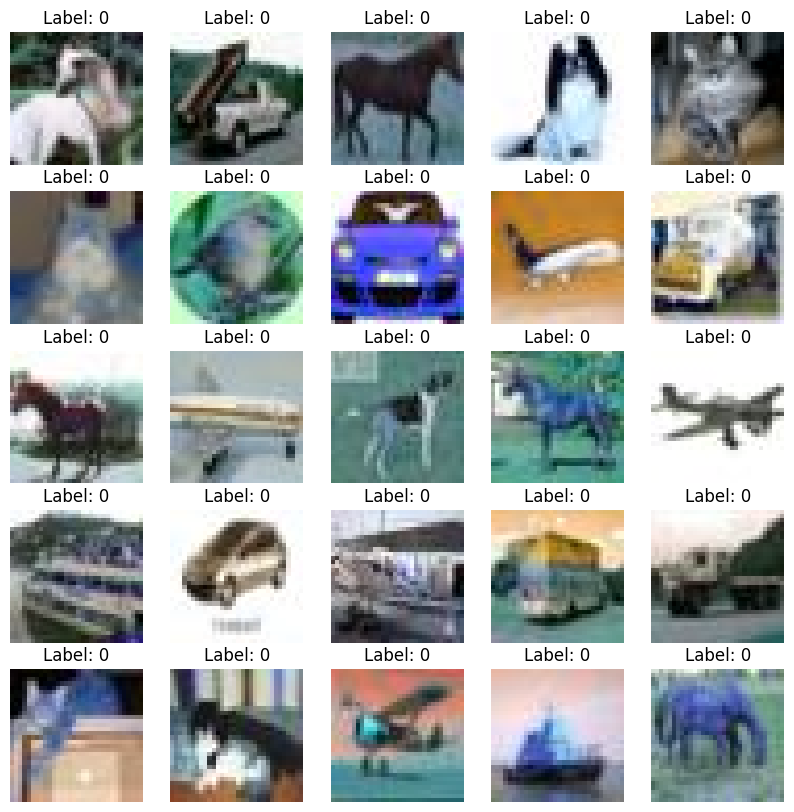

In [ ]:
import matplotlib.pyplot as plt

# Visualize a few training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title("Label: {}".format(Y_train[i]))
    plt.axis("off")
plt.show()


In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train, Y_train, epochs=1)

3125/3125 [==============================] - 284s 91ms/step - loss: 0.5483 - accuracy: 0.7179


In [ ]:
result = ann.evaluate(X_test, Y_test)

625/625 [==============================] - 17s 27ms/step - loss: 0.4965 - accuracy: 0.7520


In [ ]:
print(result)
# [0.49653390049934387, 0.75204998254776]

[0.49653390049934387, 0.75204998254776]


In [ ]:
import cv2

# Load the image
image_path = "/content/MyPhoto.jpg"
image = cv2.imread(image_path)
# Resize the image to match the input shape of your model (32x32 pixels with 3 channels)
image = cv2.resize(image, (32, 32))
# Convert the image to the same data type and scale as your training data
image = image.astype('float32') / 255.0  # Assuming you normalized your training data

# Expand the dimensions of the image to match the shape expected by the model
image = np.expand_dims(image, axis=0)

# Now, image is ready for prediction


In [ ]:
# Make predictions using your trained model
prediction = ann.predict(image)

# Get the predicted probability for the positive class (real)
predicted_probability = prediction[0][0]  # Extract the scalar value

# If predicted probability is greater than 0.5, classify it as real; otherwise, classify it as fake
if predicted_probability > 0.5:
    print("The image is predicted to be real with probability:", predicted_probability)
else:
    print("The image is predicted to be fake with probability:", predicted_probability)


1/1 [==============================] - 0s 40ms/step
The image is predicted to be real with probability: 0.99988055


**Now predicting by feeding fake image from test data**

In [ ]:
import cv2

# Load the image
image_path = "/content/1000 (5).jpg"
image = cv2.imread(image_path)
# Resize the image to match the input shape of your model (32x32 pixels with 3 channels)
image = cv2.resize(image, (32, 32))
# Convert the image to the same data type and scale as your training data
image = image.astype('float32') / 255.0  # Assuming you normalized your training data

# Expand the dimensions of the image to match the shape expected by the model
image = np.expand_dims(image, axis=0)

# Now, image is ready for prediction


In [ ]:
# Make predictions using your trained model
prediction = ann.predict(image)

# Get the predicted probability for the positive class (real)
predicted_probability = prediction[0][0]  # Extract the scalar value

# If predicted probability is greater than 0.5, classify it as real; otherwise, classify it as fake
if predicted_probability > 0.5:
    print("The image is predicted to be real with probability:", predicted_probability)
else:
    print("The image is predicted to be fake with probability:", predicted_probability)


1/1 [==============================] - 0s 32ms/step
The image is predicted to be real with probability: 0.99887586


**Now CNN**

In [ ]:
# cnn = models.Sequential([
#     # cnn layers
#     layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D(),


#     # dense network
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='softmax'),
#     layers.Dense(64, activation='softmax')
# ])

In [ ]:
# cnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# cnn.fit(X_train, Y_train, epochs=40)

In [ ]:
# cnn.evaluate(X_test, Y_test)

**DenseNet**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Adding dense layers on top of the DenseNet base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # Assuming you have 10 output classes

# Combine base model and custom dense layers into a new model
densenet_model = Model(inputs=base_model.input, outputs=predictions)


densenet_model.compile(optimizer=Adam(),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


densenet_model.fit(X_train, Y_train, epochs=1)
# evaluation = densenet_model.evaluate(X_test, Y_test)

densenet_model.evaluate(X_test, Y_test)


625/625 [==============================] - 89s 136ms/step - loss: 0.3504 - accuracy: 0.8565


[0.3503614664077759, 0.8564500212669373]

Saving the DenseNet

In [ ]:
from tensorflow.keras.models import save_model

# Define the path where you want to save your model
model_save_path = "H:\DenseNet model"

# Save the trained model to disk
densenet_model.save(model_save_path)


FGVR

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Adding Global Average Pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with ReLU activation
x = Dense(256, activation='relu')(x)

# Add the output layer with softmax activation for fine-grained categories
predictions = Dense(2, activation='softmax')(x)  # num_classes is the number of fine-grained categories


fgvr_model = Model(inputs=base_model.input, outputs=predictions)


fgvr_model.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
                   metrics=['accuracy'])

# Training the FGVR model
fgvr_model.fit(X_train, Y_train, epochs=1)

# Evaluating the FGVR model
evaluation = fgvr_model.evaluate(X_test, Y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


625/625 [==============================] - 87s 136ms/step - loss: 0.4620 - accuracy: 0.8243
Test Loss: 0.4620402753353119
Test Accuracy: 0.8243499994277954


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
y_pred = densenet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)


**Merging the train and test folders**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_cifake_dataset(folder_path):
    X = []
    Y = []

    # Define a mapping from class names to integer labels
    class_map = {'REAL': 0, 'FAKE': 1}  # Mapping 'REAL' to 0 and 'FAKE' to 1

    for dataset_type in ['train', 'test']:
        dataset_dir = os.path.join(folder_path, dataset_type)
        for class_name in os.listdir(dataset_dir):
            if class_name in class_map:  # Check if the directory name is a valid class
                class_dir = os.path.join(dataset_dir, class_name)
                class_label = class_map[class_name]  # Get the integer label corresponding to the class name
                for img_name in os.listdir(class_dir):
                    img_path = os.path.join(class_dir, img_name)
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, (32, 32))  # Resize to match CIFAR-10 image size
                    X.append(img)
                    Y.append(class_label)

    # Convert lists to numpy arrays
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

# Load CIFake dataset from the specified directory
cifake_folder_path = '/content/CIFAKE'
X, Y = load_cifake_dataset(cifake_folder_path)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.15, random_state=42)  # 15% for validation, 5% for testing

# Now you have X_train, Y_train, X_val, Y_val, X_test, and Y_test ready for training and evaluation


Validation data shape (images): (20400, 32, 32, 3)
Validation data shape (labels): (20400,)


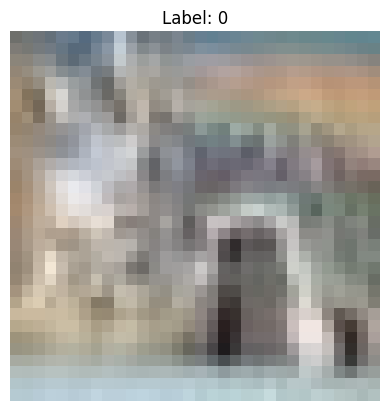

In [ ]:
# Accessing contents of validation data
print("Validation data shape (images):", X_val.shape)
print("Validation data shape (labels):", Y_val.shape)

# Here  I am accessing the first image and its corresponding label in the validation set
first_image_val = X_val[0]
first_label_val = Y_val[0]

# Example: Displaying the first image in the validation set
import matplotlib.pyplot as plt
plt.imshow(first_image_val)
plt.title("Label: " + str(first_label_val))
plt.axis('off')
plt.show()


**Again train the DenseNet model**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add Global Average Pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with ReLU activation
x = Dense(256, activation='relu')(x)

# Add the output layer with sigmoid activation
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine base model and custom dense layers into a new model
densenet_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained DenseNet except the last few
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Compile the model
densenet_model.compile(optimizer=Adam(),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = densenet_model.fit(X_train, Y_train,
                              epochs=2,
                              validation_data=(X_val, Y_val),
                              callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = densenet_model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/2
3000/3000 [==============================] - 458s 150ms/step - loss: 0.3091 - accuracy: 0.8684 - val_loss: 0.2457 - val_accuracy: 0.8981
Epoch 2/2
113/113 [==============================] - 13s 115ms/step - loss: 0.2307 - accuracy: 0.9044
Test Loss: 0.23065847158432007
Test Accuracy: 0.9044444561004639


In [ ]:
# Extract features using the pre-trained DenseNet model
features_train = base_model.predict(X_train)
features_val = base_model.predict(X_val)
features_test = base_model.predict(X_test)

# Train a classifier on top of the extracted features
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
classifier = LogisticRegression(max_iter=1000)

# Reshape the features for training
features_train_flatten = features_train.reshape(features_train.shape[0], -1)
features_val_flatten = features_val.reshape(features_val.shape[0], -1)
features_test_flatten = features_test.reshape(features_test.shape[0], -1)

# Train the classifier
classifier.fit(features_train_flatten, Y_train)

# Evaluate the classifier on validation data
val_accuracy = classifier.score(features_val_flatten, Y_val)
print("Validation Accuracy:", val_accuracy)

# Evaluate the classifier on test data
test_accuracy = classifier.score(features_test_flatten, Y_test)
print("Test Accuracy:", test_accuracy)


  42/3000 [..............................] - ETA: 4:46

KeyboardInterrupt: 

**Now Densenet as classifier in FGVR**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Load pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add Global Average Pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with ReLU activation
x = Dense(256, activation='relu')(x)

# Add the output layer with softmax activation for fine-grained categories
predictions = Dense(2, activation='softmax')(x)  # Assuming num_classes is the number of fine-grained categories

# Combine base model and custom dense layers into a new model
fgvr_model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers[:-10]:
    layer.trainable = False

# Compile the model
fgvr_model.compile(optimizer=Adam(),
                   loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
                   metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = fgvr_model.fit(X_train, Y_train,
                          epochs=2,
                          validation_data=(X_val, Y_val),
                          callbacks=[early_stopping])

# Evaluating the model on test data
test_loss, test_accuracy = fgvr_model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/2
3000/3000 [==============================] - 443s 145ms/step - loss: 0.3121 - accuracy: 0.8676 - val_loss: 0.2425 - val_accuracy: 0.9020
Epoch 2/2
113/113 [==============================] - 11s 101ms/step - loss: 0.2368 - accuracy: 0.9017
Test Loss: 0.23675569891929626
Test Accuracy: 0.9016666412353516


Taking input

In [ ]:
import cv2
import numpy as np

# Function to preprocess input image
def preprocess_image(image):
    # Resize the image to match the input size expected by the model (32x32 pixels)
    resized_image = cv2.resize(image, (32, 32))
    # Convert image to float32 and normalize it to range [0, 1]
    preprocessed_image = resized_image.astype('float32') / 255.0
    return preprocessed_image

# Load the image you want to predict
image_path = "/content/fake image.jpg"  # Replace with the path to your image
input_image = cv2.imread(image_path)

# Preprocess the input image
preprocessed_image = preprocess_image(input_image)

# Make predictions using the model
predictions = fgvr_model.predict(np.expand_dims(preprocessed_image, axis=0))

# Convert the predictions to human-readable labels
class_names = ['REAL', 'FAKE']
predicted_class = class_names[np.argmax(predictions)]

print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 132ms/step
Predicted Class: REAL


113/113 [==============================] - 25s 224ms/step


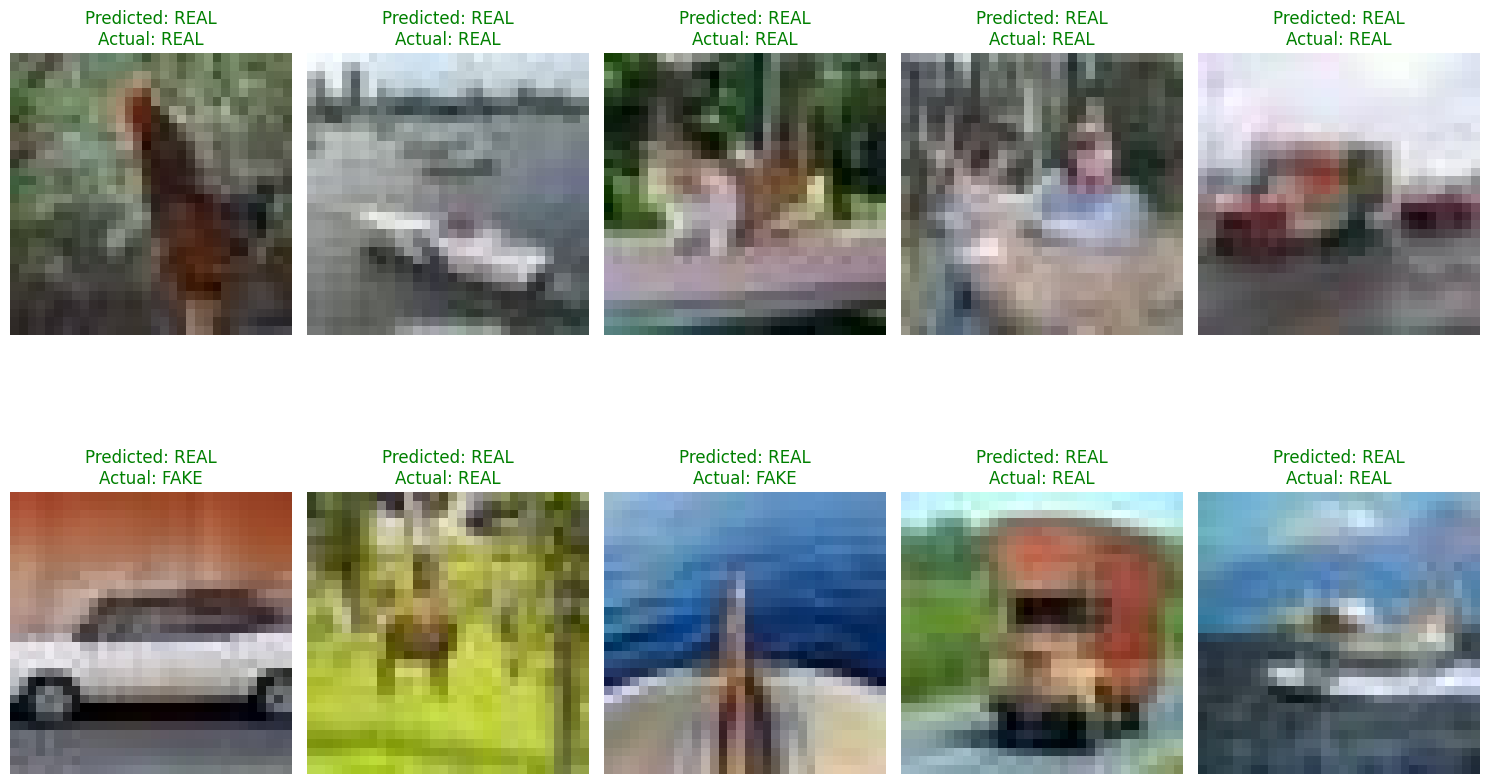

In [ ]:
import matplotlib.pyplot as plt

# Function to preprocess input image
def preprocess_image(image):
    # Resize the image to match the input size expected by the model (32x32 pixels)
    resized_image = cv2.resize(image, (32, 32))
    # Convert image to float32 and normalize it to range [0, 1]
    preprocessed_image = resized_image.astype('float32') / 255.0
    return preprocessed_image

# Load and preprocess images from the test set
preprocessed_images = [preprocess_image(image) for image in X_test]

# Make predictions using the model
predictions = fgvr_model.predict(np.array(preprocessed_images))

# Convert the predictions to human-readable labels
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

# Select a subset of images to visualize
num_images_to_visualize = 10
selected_indices = range(num_images_to_visualize)

# Visualize selected images and predictions
plt.figure(figsize=(15, 10))
for i, index in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cv2.cvtColor(X_test[index], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title(f"Predicted: {predicted_labels[index]}\nActual: {'REAL' if Y_test[index] == 0 else 'FAKE'}",
              color=('green' if predicted_labels[index] == 'REAL' else 'red'))
    plt.axis("off")
plt.tight_layout()
plt.show()


113/113 [==============================] - 19s 170ms/step


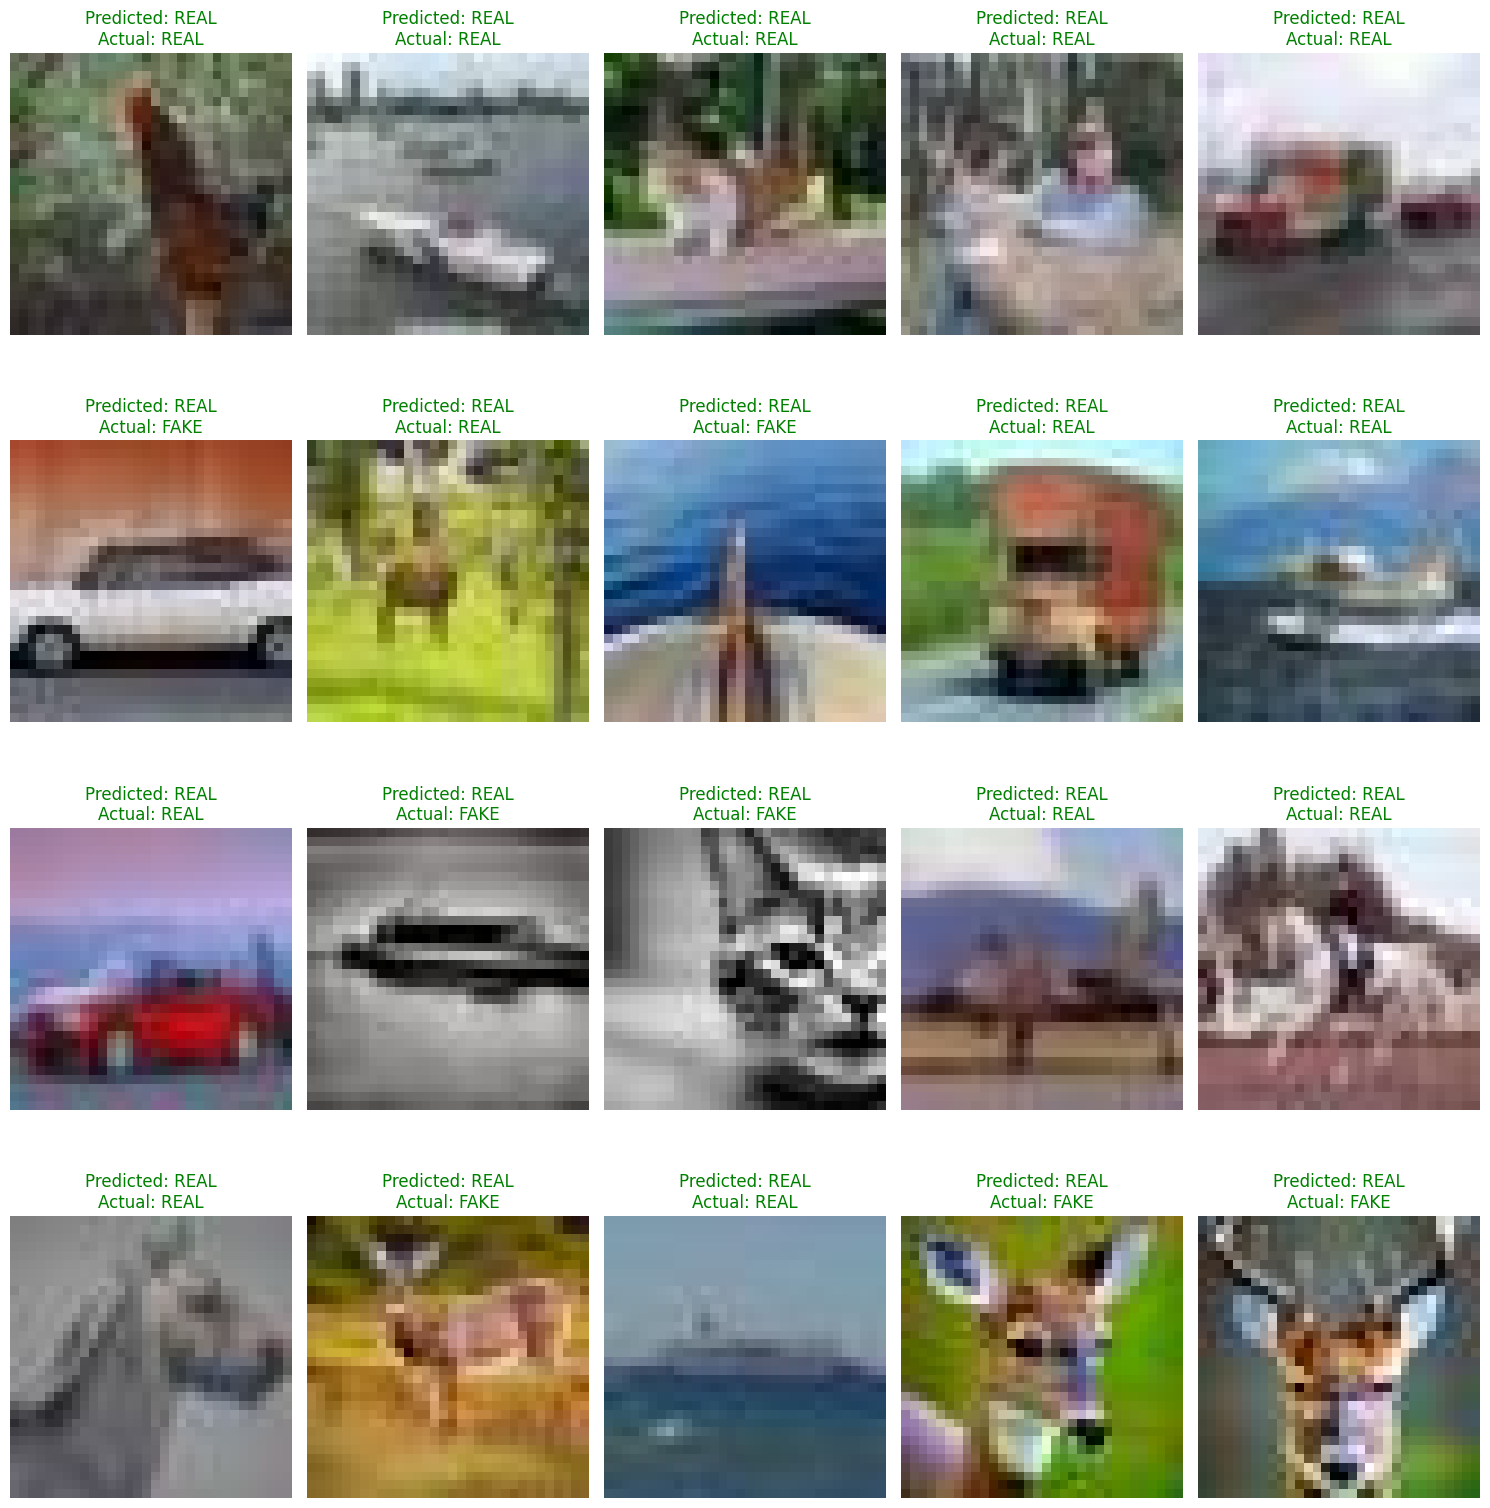

In [ ]:
import matplotlib.pyplot as plt

# Function to preprocess input image
def preprocess_image(image):
    # Resize the image to match the input size expected by the model (32x32 pixels)
    resized_image = cv2.resize(image, (32, 32))
    # Convert image to float32 and normalize it to range [0, 1]
    preprocessed_image = resized_image.astype('float32') / 255.0
    return preprocessed_image

# Load and preprocess images from the test set
preprocessed_images = [preprocess_image(image) for image in X_test]

# Make predictions using the model
predictions = fgvr_model.predict(np.array(preprocessed_images))

# Convert the predictions to human-readable labels
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

# Select a subset of images to visualize
num_images_to_visualize = 20
selected_indices = range(num_images_to_visualize)

# Visualize selected images and predictions
num_cols = 5
num_rows = (num_images_to_visualize + num_cols - 1) // num_cols
plt.figure(figsize=(15, 4 * num_rows))
for i, index in enumerate(selected_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(cv2.cvtColor(X_test[index], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.title(f"Predicted: {predicted_labels[index]}\nActual: {'REAL' if Y_test[index] == 0 else 'FAKE'}",
              color=('green' if predicted_labels[index] == 'REAL' else 'red'))
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# import shutil

# # Define paths for train and test folders
# train_folder_path = '/content/CIFAKE/train'
# test_folder_path = '/content/CIFAKE/test'

# # Define path for the merged folder
# merged_folder_path = '/content/CIFAKE/merged'

# # Create the merged folder if it doesn't exist
# if not os.path.exists(merged_folder_path):
#     os.makedirs(merged_folder_path)

# # Merge train and test folders
# for class_name in os.listdir(train_folder_path):
#     class_train_path = os.path.join(train_folder_path, class_name)
#     class_merged_path = os.path.join(merged_folder_path, class_name)
#     os.makedirs(class_merged_path, exist_ok=True)
#     # Copy images from train folder
#     for img_name in os.listdir(class_train_path):
#         shutil.copy(os.path.join(class_train_path, img_name), class_merged_path)

# for class_name in os.listdir(test_folder_path):
#     class_test_path = os.path.join(test_folder_path, class_name)
#     class_merged_path = os.path.join(merged_folder_path, class_name)
#     os.makedirs(class_merged_path, exist_ok=True)
#     # Copy images from test folder
#     for img_name in os.listdir(class_test_path):
#         shutil.copy(os.path.join(class_test_path, img_name), class_merged_path)

# print("Folders merged successfully!")


In [ ]:
# import os

# merged_folder_path = '/content/CIFAKE/merged'


In [ ]:
# import os

# merged_folder_path = '/content/CIFAKE/merged'

# # List the contents of the merged folder
# merged_contents = os.listdir(merged_folder_path)

# # Print the contents
# print("Contents of the merged folder:")
# for item in merged_contents:
#     print(item)


In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# def merge_train_test_folders(folder_path):
#     # Define the paths to the FAKE and REAL folders
#     fake_folder = os.path.join(folder_path, 'FAKE')
#     real_folder = os.path.join(folder_path, 'REAL')

#     # Define the path to the merged folder
#     merged_folder = os.path.join(folder_path, 'merged_folder')

#     # Create the merged folder if it doesn't exist
#     os.makedirs(merged_folder, exist_ok=True)

#     # Move all files from the FAKE folder to the merged folder
#     for img_name in os.listdir(fake_folder):
#         img_path = os.path.join(fake_folder, img_name)
#         dest_path = os.path.join(merged_folder, img_name)
#         shutil.move(img_path, dest_path)

#     # Move all files from the REAL folder to the merged folder
#     for img_name in os.listdir(real_folder):
#         img_path = os.path.join(real_folder, img_name)
#         dest_path = os.path.join(merged_folder, img_name)
#         shutil.move(img_path, dest_path)

#     print("Merged FAKE and REAL folders into merged_folder.")

# def split_merged_folder(merged_folder_path, train_size=0.8, val_size=0.15, test_size=0.05, random_state=42):
#     # Define the paths for train, validation, and test folders
#     train_folder = os.path.join(merged_folder_path, 'train_after_splitting')
#     val_folder = os.path.join(merged_folder_path, 'validation_after_splitting')
#     test_folder = os.path.join(merged_folder_path, 'test_after_splitting')

#     # Create train, validation, and test folders if they don't exist
#     os.makedirs(train_folder, exist_ok=True)
#     os.makedirs(val_folder, exist_ok=True)
#     os.makedirs(test_folder, exist_ok=True)

#     # List all files in the merged folder
#     all_files = [os.path.join(merged_folder_path, file) for file in os.listdir(merged_folder_path)]

#     if len(all_files) == 0:
#         print("No files found in the merged folder.")
#         return

#     # Split the files into train, validation, and test sets
#     train_files, val_test_files = train_test_split(all_files, train_size=train_size, random_state=random_state)
#     val_files, test_files = train_test_split(val_test_files, train_size=val_size/(val_size+test_size), random_state=random_state)

#     # Move files to train folder
#     for file in train_files:
#         dest_path = os.path.join(train_folder, os.path.basename(file))
#         shutil.move(file, dest_path)

#     # Move files to validation folder
#     for file in val_files:
#         dest_path = os.path.join(val_folder, os.path.basename(file))
#         shutil.move(file, dest_path)

#     # Move files to test folder
#     for file in test_files:
#         dest_path = os.path.join(test_folder, os.path.basename(file))
#         shutil.move(file, dest_path)

#     print("Splitting completed successfully.")

# # Define the path to the CIFAKE folder
# cifake_folder_path = '/content/CIFAKE'

# # Merge the FAKE and REAL folders into merged_folder
# merge_train_test_folders(cifake_folder_path)

# # Define the path to the merged folder
# merged_folder_path = os.path.join(cifake_folder_path, 'merged_folder')

# # Split the merged folder into train, validation, and test sets
# split_merged_folder(merged_folder_path)


**Splitting into train, validation and test**